In [1]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

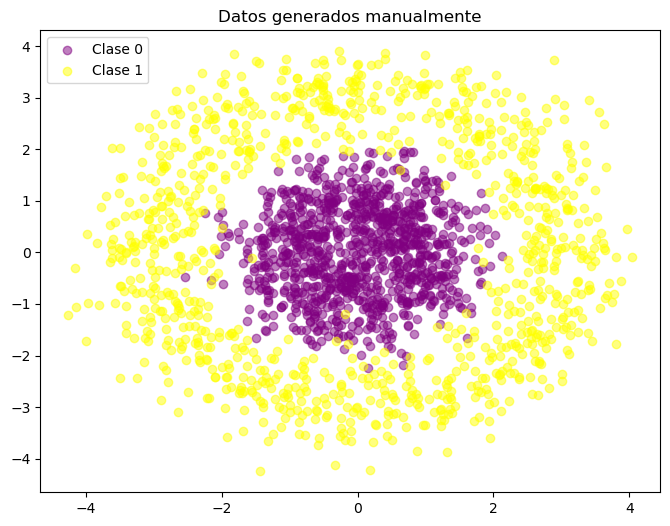

In [2]:
def make_classification(r0=1, r1=3, k=1000):
    """
    Creación de los datos
    """
    X1 = [np.array([r0*np.cos(t), r0*np.sin(t)]) for t in range(0,k)]
    X2 = [np.array([r1*np.cos(t), r1*np.sin(t)]) for t in range(0,k)]

    X = np.concatenate((X1,X2))
    n, d = X.shape
    Y = np.zeros(2*k)
    Y[k:] += 1
    noise = np.array([np.random.normal(0,1,2) for i in range(n)])
    X += 0.5*noise

    return X, Y

X, y = make_classification(r0=1, r1=2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X, y = make_classification(r0=1, r1=3)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:,1], color='purple', label='Clase 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:,1], color='yellow', label='Clase 1', alpha=0.5)
plt.title('Datos generados manualmente')
plt.legend()
plt.show()

In [3]:
# Ejemplo de uso
def test_backprop():
    # Creamos datos de ejemplo
    x = Variable(x_train)
    y_true = y_train  # One-hot encoding para 2 clases
    
    # Creamos una capa lineal
    linear = Linear(2, 2)
    
    # Forward pass
    hidden = linear(x)
    softmax = Softmax()
    output = softmax(hidden)
    
    # Calculamos la pérdida
    criterion = CrossEntropy()
    loss = criterion(y_true, output)
    
    # Backward pass
    loss.backward()
    
    # Verificamos que los gradientes se han calculado
    print("Gradiente en la salida:", output.gradiente)
    print("Gradiente en la capa oculta:", hidden.gradiente)
    print("Gradiente en la entrada:", x.gradiente)

In [4]:
test_backprop()

Gradiente en la salida: [[-7.09227774e-04 -5.05794008e-06]
 [ 3.15241299e-05  6.82761584e-04]
 [-1.99887657e-06 -7.12286838e-04]
 ...
 [-7.14097199e-04 -1.88514835e-07]
 [ 1.48401473e-04  5.65884242e-04]
 [ 1.98814074e-04  5.15471640e-04]]
Gradiente en la capa oculta: [[-7.09227774e-04 -5.05794008e-06]
 [ 3.15241299e-05  6.82761584e-04]
 [-1.99887657e-06 -7.12286838e-04]
 ...
 [-7.14097199e-04 -1.88514835e-07]
 [ 1.48401473e-04  5.65884242e-04]
 [ 1.98814074e-04  5.15471640e-04]]
Gradiente en la entrada: [[ 1.40023080e-03  1.19936620e-03]
 [ 2.12168959e-05  7.00440868e-04]
 [-8.31445594e-05 -7.83209029e-04]
 ...
 [ 1.41044416e-03  1.21301666e-03]
 [-2.23927174e-04  3.72798538e-04]
 [-3.29664950e-04  2.31476858e-04]]


In [18]:
def test_backprop_complex():
    #datos de entrada
    x = Variable(x_train)
    y_true = y_train

    #definimos la arquitectura
    #capa1: 2 neuronas entrada -> 4 neuronas ocultas
    linear1 = Linear(input_size=2, output_size=4)
    tanh = Tanh()

    # capa2: 4 neuronas ocultas -> 3 neuronas ocultas
    linear2 = Linear(input_size=4, output_size=3)
    relu = ReLU()

    # capa3: 3 neuronas -> 2 neuronas de salida
    linear3 = Linear(input_size=3, output_size=2)
    softmax = Softmax()

    # Forward pass
    # primera capa oculta con tanh
    hidden1 = linear1(x)
    hidden1_act = tanh(hidden1)

    # segunda capa oculta con ReLU
    hidden2 = linear2(hidden1_act)
    hidden2_act = relu(hidden2)

    # capa de salida con softmax
    output_linear = linear3(hidden2_act)
    output = softmax(output_linear)

    # calculamos la perdida
    criterion = CrossEntropy()
    loss = criterion(y_true, output)

    #backward pass
    loss.backward()

    # Imprimimos los resultados
    #print("\nResultados del forward pass:")
    #print("Salida de la red:", output.out)
    #print("Pérdida:", loss.out)
    #print("--------------------------------------------------")
    #print("\nPesos y gradientes de las capas lineales:")
    #print("Capa 1:")
    #print("Gradiente de los pesos:", linear1.grad_w)
    #print("Gradiente del bias:", linear1.grad_b)

    grads ={
        "W1":linear1.grad_w, "b1":linear1.grad_b,
        "W2":linear2.grad_w, "b2":linear2.grad_b,
        "w3":linear3.grad_w, "b3":linear3.grad_b
    }

    return grads

In [30]:
grads = test_backprop_complex()
grads["b3"]

array([-3.03002983e-05,  4.15247881e-05])

In [3]:
f = Sequential(Linear(2,10), Tanh(), Linear(10,10), ReLU(), Linear(10,2), Softmax())

In [4]:
x = Variable(x_train)
pred = f(x)

In [5]:
pred.out[:10]

array([[2.42477295e-02, 9.75752271e-01],
       [1.09614182e-02, 9.89038582e-01],
       [4.16127094e-04, 9.99583873e-01],
       [5.92284993e-04, 9.99407715e-01],
       [1.14869231e-04, 9.99885131e-01],
       [1.74663804e-02, 9.82533620e-01],
       [4.22085406e-05, 9.99957791e-01],
       [3.35598006e-04, 9.99664402e-01],
       [5.38709078e-02, 9.46129092e-01],
       [8.66591849e-04, 9.99133408e-01]])

In [6]:
np.sum(pred.out[7])

0.9999999999999999

In [7]:
criterion = CrossEntropy()
loss = criterion(y_train, pred)
loss.out

3.138368137240155

In [8]:
loss.backward()

In [9]:
f[0].w # pesos con los que inicializo el modelo

array([[ 1.77974611, -0.8598922 , -0.41011979,  0.1810236 ,  0.6251699 ,
         1.19639122, -0.3934375 ,  0.83928682,  0.32752735,  0.85072184],
       [-0.40401569,  1.11837384,  0.62307202, -0.39327399,  0.5394266 ,
        -3.21272677, -1.05332448, -2.30872633, -0.51923253, -1.14513591]])

In [10]:
f[0].grad_w # gradiente

array([[-0.06880672,  0.07174228, -0.01356842,  0.18327247, -0.06205226,
         0.05629468, -0.49952742, -0.03916859,  0.49455792, -0.11152156],
       [-0.26070888, -0.1132235 ,  0.06960287, -0.08455627,  0.46923862,
         0.04390335,  0.00955707, -0.02874854,  0.37284768,  0.11995468]])

In [11]:
params = {
    "w1":f[0].w,
    "b2":f[0].b,
    "w2":f[2].w,
    "b2":f[2].b,
    "w3":f[4].w,
    "b3":f[4].b
}

grads = {
    "w1":f[0].grad_w,
    "b2":f[0].grad_b,
    "w2":f[2].grad_w,
    "b2":f[2].grad_b,
    "w3":f[4].grad_w,
    "b3":f[4].grad_b
}

In [12]:
# ahora utilizamos el optimizador
optimizador = AdagradOptimizer(learning_rate=0.1, epsilon=1e-8)
optimizador.update(params, grads)

print("Parametros actualizados")
for key in params:
    print(f"{key}: {params[key]}")

Parametros actualizados
w1: [[ 1.87974609 -0.95989219 -0.31011987  0.0810236   0.72516988  1.09639124
  -0.2934375   0.93928679  0.22752735  0.95072183]
 [-0.30401569  1.21837384  0.52307204 -0.293274    0.43942661 -3.31272674
  -1.15332438 -2.20872636 -0.61923252 -1.2451359 ]]
b2: [ 0.49917064  0.86250207  0.12021786  0.7597078   0.27032878  0.63069723
 -2.27477607 -0.17031318 -1.71596108  0.02784483]
w2: [[-0.44042311 -1.42524387 -1.05405765  1.31869387  0.75176349  0.32979521
   1.38736481  1.00172874 -0.62291446 -0.73258296]
 [-1.48241769 -0.35998336  1.1557818   0.44235255  0.1911801   1.10514334
  -0.46556238 -0.11647024  1.209223    0.33745857]
 [-0.82910941 -0.28323303 -1.86117611  0.38409189  0.65499028  0.32826707
  -0.38747651 -0.83848666  0.91146829  0.41472078]
 [ 0.92186929  0.96708327  0.22398152 -1.66215635 -0.13425112  0.83672305
  -0.33049853  0.14278461 -1.19138009 -0.35905368]
 [ 0.25915242  0.02478277  2.16190251  0.17526736  0.33035208  1.10360383
   0.07226506 -1

In [16]:
f[0].grad_w

array([[-0.06880672,  0.07174228, -0.01356842,  0.18327247, -0.06205226,
         0.05629468, -0.49952742, -0.03916859,  0.49455792, -0.11152156],
       [-0.26070888, -0.1132235 ,  0.06960287, -0.08455627,  0.46923862,
         0.04390335,  0.00955707, -0.02874854,  0.37284768,  0.11995468]])